# What is Outliers?

#### An outlier is a data point that is significantly different from other data points in a dataset. It is an observation that lies an abnormal distance away from other observations in the same dataset. 

##### The decision of whether to perform data transformation before or after removing outliers depends on the specific situation and the type of transformation being applied.

In some cases, it may be more appropriate to perform data transformation before removing outliers. For example, if the data is highly skewed, performing a log transformation or a power transformation may make it more symmetric and easier to identify and remove outliers. In this case, it would be better to transform the data first and then remove outliers using the transformed data.

In other cases, it may be more appropriate to remove outliers before performing data transformation. For example, if the data contains extreme values that are affecting the distribution and statistical analyses, removing the outliers first may help to identify the appropriate transformation to apply to the data.

In general, it's a good practice to explore and visualize the data before deciding whether to perform data transformation or outlier removal first. This can help you better understand the nature of the data and identify any potential issues that may need to be addressed.

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data=pd.read_csv("housing.csv")
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [54]:

data.dropna(axis=0, inplace=True)
data.isnull().sum()
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


## Outlier identifying

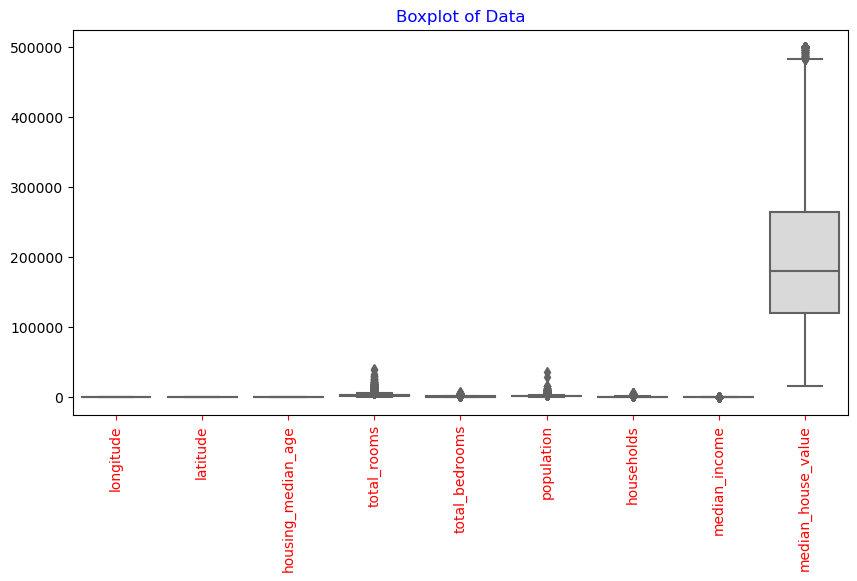

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data, ax=ax, palette='Set3')
ax.set_title('Boxplot of Data', color='blue',)
ax.tick_params(axis='x', labelrotation=90, colors='red')
plt.show()

In [46]:
import warnings
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(dataframe, feature):
    warnings.filterwarnings("ignore")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    sns.boxplot(dataframe[feature], saturation=5.0, width=.25, ax=ax1)
    ax1.set_title('Box Plot of Data',color='blue',)
    ax1.set_xlabel(feature ,color='red')

    sns.distplot(dataframe[feature], kde=True, rug=True, color='blue',
                 kde_kws={"color": "red", "lw": 2, "alpha": 0.7},
                 hist_kws={"linewidth":.5, "alpha": 0.25}, ax=ax2)
    ax2.set_title('Distribution Plot of Data',color='blue',)
    ax2.set_xlabel(feature ,color='red')
    plt.show()

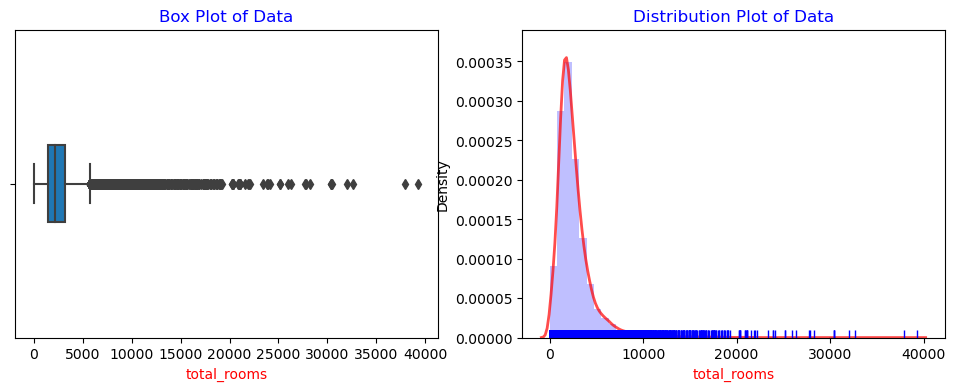

In [47]:
plot_data(data, "total_rooms")

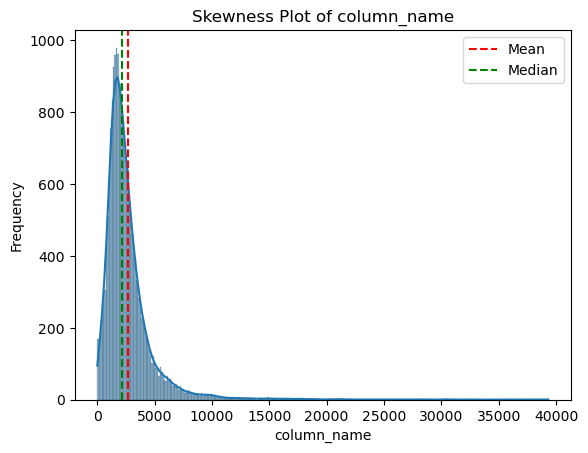

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the data
sns.histplot(data=data, x='total_rooms', kde=True)

# Add a vertical line for the mean
plt.axvline(x=data['total_rooms'].mean(), color='red', linestyle='--', label='Mean')

# Add a vertical line for the median
plt.axvline(x=data['total_rooms'].median(), color='green', linestyle='--', label='Median')

# Add a legend
plt.legend()

# Set the plot title and axis labels
plt.title('Skewness Plot of column_name')
plt.xlabel('column_name')
plt.ylabel('Frequency')

# Show the plot
plt.show()


## Removing outlier methods

## 1. IQR Method  (Using 1.5 times)

In [49]:
Q1 = data["total_rooms"].quantile(0.25)
Q3 = data["total_rooms"].quantile(0.75)
IQR = Q3 - Q1
total_roomsdata=data[(data["total_rooms"] >= Q1 - 1.5*IQR) & (data["total_rooms"] <= Q3 + 1.5*IQR)]
cleandata=data.merge(total_roomsdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(total_roomsdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))

original data count                              : 20433
Count of outlier removed data                    : 19143
Count of after removing outlier of the dataframe : 19143


###  IQR Method  (Using 3 times)

In [50]:
Q1 = data["total_bedrooms"].quantile(0.25)
Q3 = data["total_bedrooms"].quantile(0.75)
IQR = Q3 - Q1
total_bedroomsdata=data[(data["total_bedrooms"] >= Q1 - 3*IQR) & (data["total_bedrooms"] <= Q3 + 3*IQR)]
cleandata=cleandata.merge(total_bedroomsdata,how="inner",indicator=False)
print("original data count                              :",len(data))
print("Count of outlier removed data                    :",len(total_bedroomsdata))
print("Count of after removing outlier of the dataframe :",len(cleandata))

original data count                              : 20433
Count of outlier removed data                    : 19990
Count of after removing outlier of the dataframe : 19127


### 2. Z score method

In [58]:
z_thresh = 3
df=data["population"]
# remove outliers using z-score method
df_clean = df[(np.abs(df - df.mean()) / df.std()) < z_thresh].dropna()
len(df_clean)

20094

### 3.Percentile based

In [61]:

# Calculate the 1st percentile value
p1 = data['median_house_value'].quantile(0.01)

# Remove all observations that fall below the 1st percentile value
data = data[data['median_house_value'] >= p1]
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 4.Winsorizing is a method 

#### Winsorizing is a method for handling outliers that involves replacing the extreme values with less extreme values. This can be done by setting a threshold for the extreme values, and then replacing them with values that fall within the threshold. The threshold is typically defined using percentiles, such as the top and bottom 5% of values. For example, if the top 5% of values are considered to be outliers, they can be replaced with the 95th percentile value, and if the bottom 5% of values are considered to be outliers, they can be replaced with the 5th percentile value.

Winsorizing can be a good approach when the extreme values are not genuine outliers, but rather reflect the upper or lower limits of the measurement scale. In such cases, removing these values can result in a loss of information and may distort the distribution of the data. Winsorizing allows the extreme values to be retained in the dataset, while also reducing their influence on statistical measures and analyses.

In [64]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Winsorize the column containing outliers
column_winsorized = winsorize(data['median_income'], limits=[0.05, 0.05])

# Create a boolean mask to identify the outliers
outlier_mask = (data['median_income'] < column_winsorized.min()) | (data['median_income'] > column_winsorized.max())

# Replace the outliers with Winsorized values
data.loc[outlier_mask, 'median_income'] = column_winsorized[outlier_mask]

# Print the summary statistics of the updated column
print(data['median_income'].describe())
data

count    20043.000000
mean         3.829388
std          1.555744
min          1.645000
25%          2.607250
50%          3.571400
75%          4.781300
max          7.344500
Name: median_income, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,7.3445,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,7.3445,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.6450,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 5.Trimming

#### Trimming is useful when the extreme values are likely to be due to measurement errors or other artifacts rather than true values of the variable. For example, if a sensor malfunctioned and recorded very high or very low values for a particular variable, trimming could be used to remove these values and improve the accuracy of the analysis. However, trimming should be used with caution because it can also remove legitimate values that are important for the analysis.

In [69]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'B': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})

# calculate the 5th and 95th percentiles of each column
low = df.quantile(0.05)
high = df.quantile(0.95)

# trim the DataFrame by removing values outside the 5th and 95th percentiles
df_trimmed = df[(df >= low) & (df <= high)]

print(df_trimmed)


     A     B
0  NaN   NaN
1  2.0  20.0
2  3.0  30.0
3  4.0  40.0
4  5.0  50.0
5  6.0  60.0
6  7.0  70.0
7  8.0  80.0
8  9.0  90.0
9  NaN   NaN


### Others:

##### Clustering: This method involves grouping similar observations together and treating them as a single observation. This can be useful if there are a small number of outliers that are very different from the rest of the data.

Data transformation: This method involves transforming the data to reduce the impact of outliers. For example, you may apply a log transformation to a skewed distribution to make it more symmetric and reduce the impact of extreme values.